In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv('crime_data.csv')

In [27]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
data.columns=['U.S_State','Murder','Assault','UrbanPop','Rape']

In [29]:
data.head()

,U.S_State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [30]:
data.info()
#no null value present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   U.S_State  50 non-null     object 
 1   Murder     50 non-null     float64
 2   Assault    50 non-null     int64  
 3   UrbanPop   50 non-null     int64  
 4   Rape       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [31]:
data.dtypes

U.S_State     object
Murder       float64
Assault        int64
UrbanPop       int64
Rape         float64
dtype: object

In [32]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [33]:
for i in data:
    if(data[i].dtype!='object'):
        data[i]=scalar.fit_transform(data[[i]])
#here we can also use StandardScalar method 

In [34]:
data.head()

,U.S_State,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


# HClustering

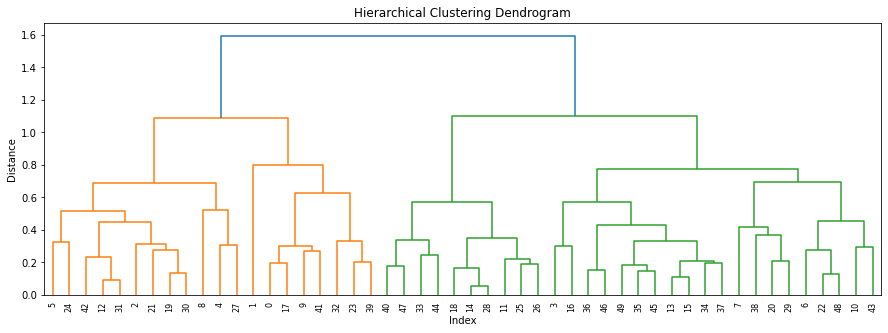

In [35]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram  
z = linkage(data.iloc[:,1:], method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()
#here we can use different method and metrics 
#from dendogram it's clearly visible that we can form 3 clusters if we cut the dendogram from distance 1.5

In [36]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(data.iloc[:,1:]) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data['clust']=cluster_labels # creating a  new column and assigning it to new column 
data

,U.S_State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,0.746988,0.654110,0.440678,0.359173,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,0
2,Arizona,0.439759,0.852740,0.813559,0.612403,0
3,Arkansas,0.481928,0.496575,0.305085,0.315245,1
4,California,0.493976,0.791096,1.000000,0.860465,0
5,Colorado,0.427711,0.544521,0.779661,0.811370,0
6,Connecticut,0.150602,0.222603,0.762712,0.098191,1
7,Delaware,0.307229,0.660959,0.677966,0.219638,1
8,Florida,0.879518,0.993151,0.813559,0.635659,0
9,Georgia,1.000000,0.568493,0.474576,0.478036,0


In [37]:
data.iloc[:,1:].groupby('clust').mean()
#This is the average rate of crime occured in different clusters
#From this we can conclude that cluster 2 states have less crime and cluster 1 have highest crime rate

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,0.684639,0.720034,0.616949,0.564987
1,0.296084,0.298973,0.657627,0.279070
2,0.143373,0.115411,0.293220,0.111886


In [38]:
data[data['clust']==0]['U.S_State']
#high crime rate states in United States

0            Alabama
1             Alaska
2            Arizona
4         California
5           Colorado
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
24          Missouri
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
42             Texas
Name: U.S_State, dtype: object

In [56]:
data[data['clust']==2]['U.S_State']
#low crime rate states in United States

11            Idaho
14             Iowa
18            Maine
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
Name: U.S_State, dtype: object

# KMean Clustering

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


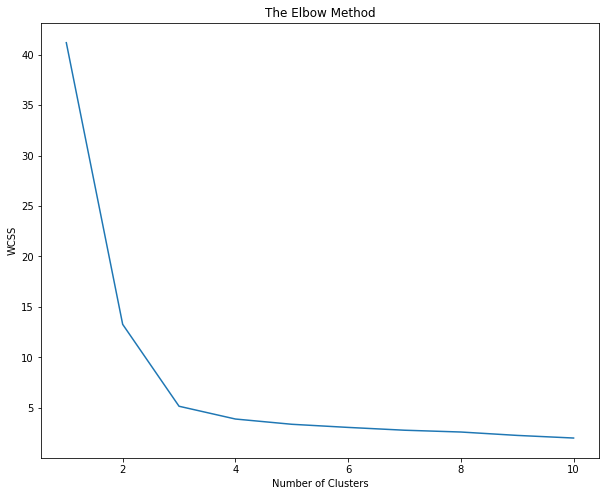

In [40]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data.iloc[:,1:])
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()
# After 4 there is minimal slope so we can n_cluster=4

In [41]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data.iloc[:,1:])

In [42]:
data['Clusters']=y_kmeans
data.head()
#Here we can see differences of two methods. first Hclust predict Alabama in clust 0 but here Kmean it's in cluster 3

,U.S_State,Murder,Assault,UrbanPop,Rape,clust,Clusters
0,Alabama,0.746988,0.654110,0.440678,0.359173,0,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,0,0
2,Arizona,0.439759,0.852740,0.813559,0.612403,0,0
3,Arkansas,0.481928,0.496575,0.305085,0.315245,1,2
4,California,0.493976,0.791096,1.000000,0.860465,0,0


In [43]:
data.iloc[:,1:5].groupby(data.Clusters).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,0.603336,0.727345,0.745763,0.669052
1,0.143373,0.115411,0.293220,0.111886
2,0.296084,0.298973,0.657627,0.279070
3,0.835628,0.706458,0.377724,0.371724


Text(0.5, 1.0, 'Clusters using KMeans')

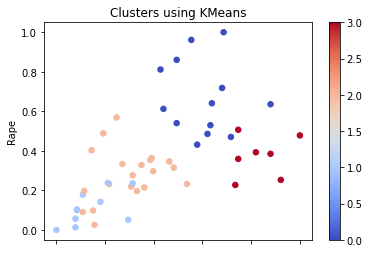

In [44]:
data.plot(x="Murder",y ="Rape",c=clf.labels_,kind="scatter",s=30,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [45]:
data[data['Clusters']==0]['U.S_State']
#highest crime rate states

1         Alaska
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: U.S_State, dtype: object

In [46]:
data[data['Clusters']==1]['U.S_State']
#low crime rate states

11            Idaho
14             Iowa
18            Maine
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
Name: U.S_State, dtype: object

In [51]:
data[(data['clust']==2) &(data['Clusters']==1)]
#if we compare both methods result then we can find some similar states in highest crime or lowest crime rate
#this below table represent common states having less crime rate predicted by hclustering and kmean

,U.S_State,Murder,Assault,UrbanPop,Rape,clust,Clusters
11,Idaho,0.108434,0.256849,0.372881,0.178295,2,1
14,Iowa,0.084337,0.037671,0.423729,0.103359,2,1
18,Maine,0.078313,0.130137,0.322034,0.012920,2,1
25,Montana,0.313253,0.219178,0.355932,0.235142,2,1
26,Nebraska,0.210843,0.195205,0.508475,0.237726,2,1
28,New Hampshire,0.078313,0.041096,0.406780,0.056848,2,1
33,North Dakota,0.000000,0.000000,0.203390,0.000000,2,1
40,South Dakota,0.180723,0.140411,0.220339,0.142119,2,1
44,Vermont,0.084337,0.010274,0.000000,0.100775,2,1
47,West Virginia,0.295181,0.123288,0.118644,0.051680,2,1


# DBScan 

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
dbscan=DBSCAN(eps=0.50,min_samples=5)
dbscan.fit(data.iloc[:,1:5])

DBSCAN()

In [54]:
dbscan.labels_
#here -1 is consider as a noisy sample

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

Text(0.5, 1.0, 'Clusters using DBScan')

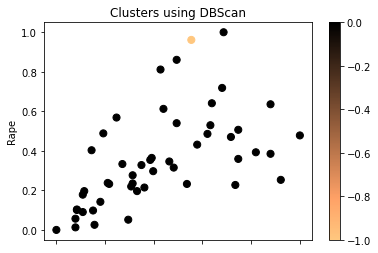

In [55]:
data.plot(x="Murder",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')   